###### <h1><center>Heart Attack Analysis & PredictionðŸ©ºðŸ«€</center></h1>

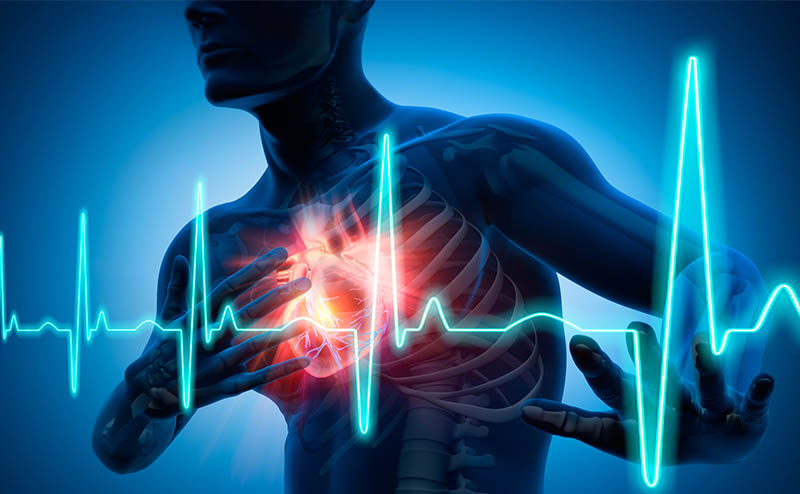

### 1. INTRODUCTION
#### 1.1 Data Description

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : fasting blood sugar > 120 mg/dl

       1 = true
       0 = false

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exng: exercise induced angina 
    
      1 = yes 
      0 = no
      
old peak: ST depression induced by exercise relative to rest

slp: the slope of the peak exercise ST segment

       0 = unsloping
       1 = flat
       2 = downsloping

caa: number of major vessels (0-3)

thall : thalassemia
    
        0 = null
        1 = fixed defect
        2 = normal
        3 = reversable defect

target : diagnosis of heart disease (angiographic disease status)
        
        0= less chance of heart attack
        1= more chance of heart attack

#### 1.2 Objective
To predict if a person is vulnerable to heart attack or not

### 2. DATA QUALITY ASSESSMENT

#### 2.1 Importing Dependencies

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import math

import warnings 
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup Complete")

Setup Complete


#### 2.2 Reading Dataset

In [2]:
# Reading dataset
df = pd.read_csv('.//Dataset//heart.csv')

df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

#### 2.3 Shape of Dataset

In [3]:
print('The shape of dataset is : ', df.shape)

The shape of dataset is :  (303, 14)


#### 2.4 Examining Data Types

In [4]:
# Checking data-types of each feature
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### 2.5 Unique Counts

In [5]:
d = {}

# finding unique counts
for col in list(df.columns):
    
    d[col] = df[col].value_counts().shape[0]

# Converting dict to dataframe
pd.DataFrame(d, index=['Unique Counts']).transpose()

Unique Counts
age                  41
sex                   2
cp                    4
trtbps               49
chol                152
fbs                   2
restecg               3
thalachh             91
exng                  2
oldpeak              40
slp                   3
caa                   5
thall                 4
output                2

#### 2.6 Missing Values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

##### Observations:
 - There are no NaN values in the data.

#### 2.7 Unique Values of each feature

In [7]:
unique_val = defaultdict(list)

for col in df.columns:
    
    unique_val[col].append(list(df[col].unique()))
    
# Converting dict to dataframe
pd.DataFrame(unique_val, index=['Unique Values']).transpose()

Unique Values
age       [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                  [1, 0]
cp                                             [3, 2, 1, 0]
trtbps    [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
chol      [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fbs                                                  [1, 0]
restecg                                           [0, 1, 2]
thalachh  [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exng                                                 [0, 1]
oldpeak   [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
slp                                               [0, 2, 1]
caa                                         [0, 2, 1, 3, 4]
thall                                          [1, 2, 3, 0]
output                                               [1, 0]

##### Observations:
 - Some features can be considered as categorical features e.g. - sex, chest pain type, number of major vessels etc

In [8]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

target = ['output']

print('Categorical Features are : ', cat_features)

print('Continuous Features are : ', cont_features)

print('Target is : ', target)

Categorical Features are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Continuous Features are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target is :  ['output']


#### 2.8 Summary Stats

In [9]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### 3. Exploratory Data Analysis(EDA)

#### 3.1 Univariate Analysis & Visualization

In [10]:
class Plot:
    
    def __init__(self, fig, axes):
        
        plt.figure(figsize=(800,800))
        
        self.fig, self.axes = fig, axes
        
        self.i, self.j = 0, 0

    def count_plot(self, feat = None):
        
        if not feat:
            
            self.axes[self.i][self.j].set_xticklabels([])
            
            self.axes[self.i][self.j].set_yticklabels([])
            
            self.axes[self.i][self.j].text(0.5,0.5, 
                                            'COUNT PLOT\n FOR\n VARIOUS\n CATEGORICAL FEATURES', 
                                             horizontalalignment='center',
                                             verticalalignment='center',
                                             fontsize=18, fontweight='bold',
                                             fontfamily='serif',
                                             color="#000000")
            
        else:
        
            sns.countplot(x=df[feat], hue=df[feat], ax = self.axes[self.i][self.j],
                         dodge=False)
        
            self.axes[self.i][self.j].set_title(feat, fontsize=10)
            
            #self.axes[self.i][self.j].set_xticks()
        
        self.j += 1
        
        if self.j > 2:
            
            self.i += 1
            
            self.j = 0
            
    def box_plot(self, feat = None):
        
        if not feat:
            
            self.axes[self.i][self.j].set_xticklabels([])
            
            self.axes[self.i][self.j].set_yticklabels([])
            
            self.axes[self.i][self.j].text(0.5,0.5, 
                                            'BOX PLOT\n FOR\n VARIOUS\n CONTINUOUS FEATURES',
                                             horizontalalignment='center',
                                             verticalalignment='center',
                                             fontsize=18, fontweight='bold',
                                             fontfamily='serif',
                                             color="#000000")
        else:
        
            sns.boxplot(y=df[feat], width=0.6, ax = self.axes[self.i][self.j])
        
            self.axes[self.i][self.j].set_title(feat, fontsize=10)
        
        self.j += 1
        
        if self.j > 2:
            
            self.i += 1
            
            self.j = 0

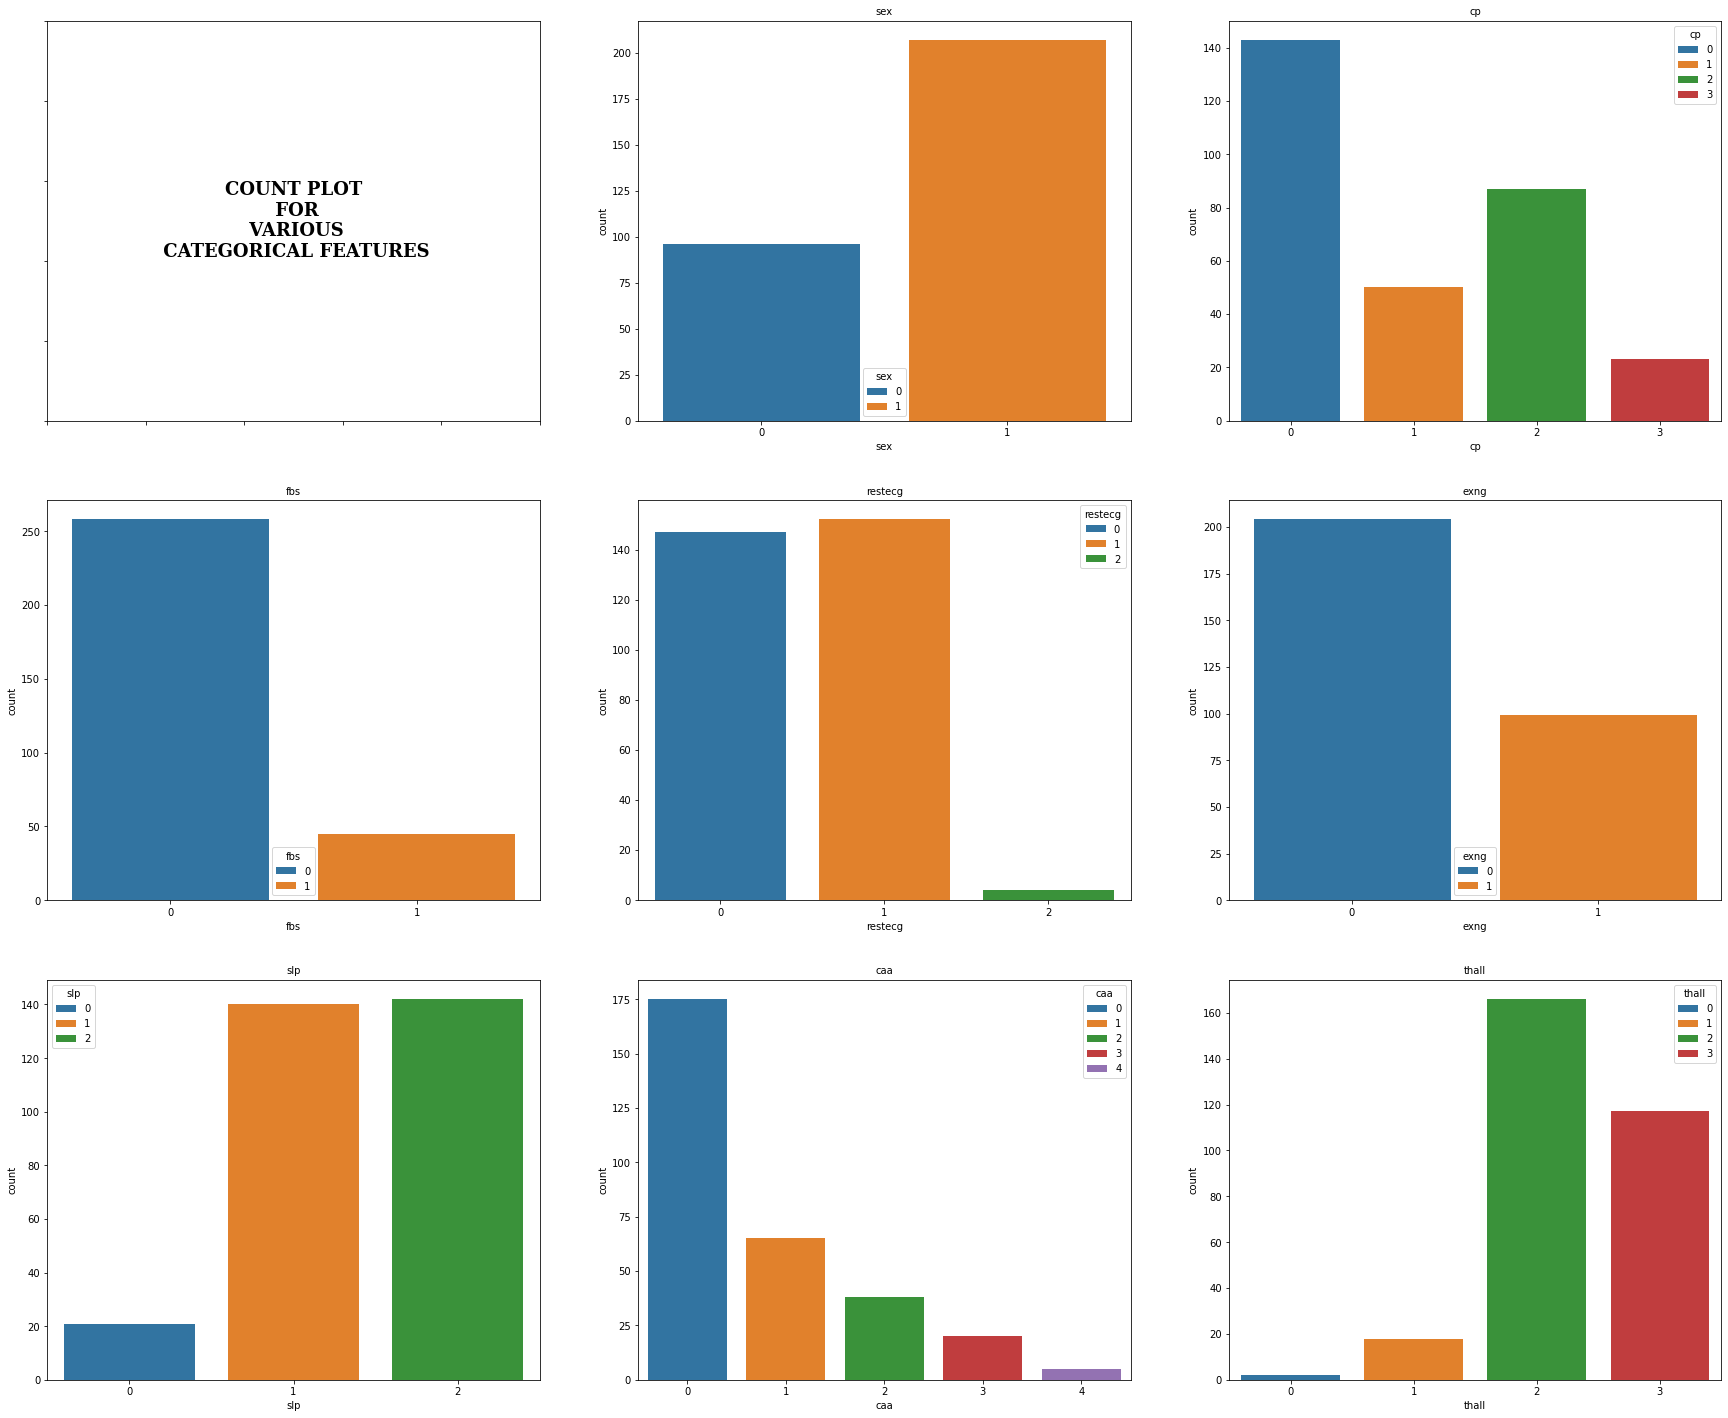

<Figure size 57600x57600 with 0 Axes>

In [11]:
# Visulaizing categorical features
fig1, axes1 = plt.subplots(3, 3, figsize=(30, 25))

cplot = Plot(fig1, axes1)

# For heading
cplot.count_plot()

for feat in cat_features:
    
    cplot.count_plot(feat)

##### Observations:
 - Data contains twice the number of people with sex = 1 than sex = 0
 - More data available with fasting_blood_sugar <= 120 mg/dl
 - 33% people have exercise induced angina (pain in the chest that comes on with exercise)

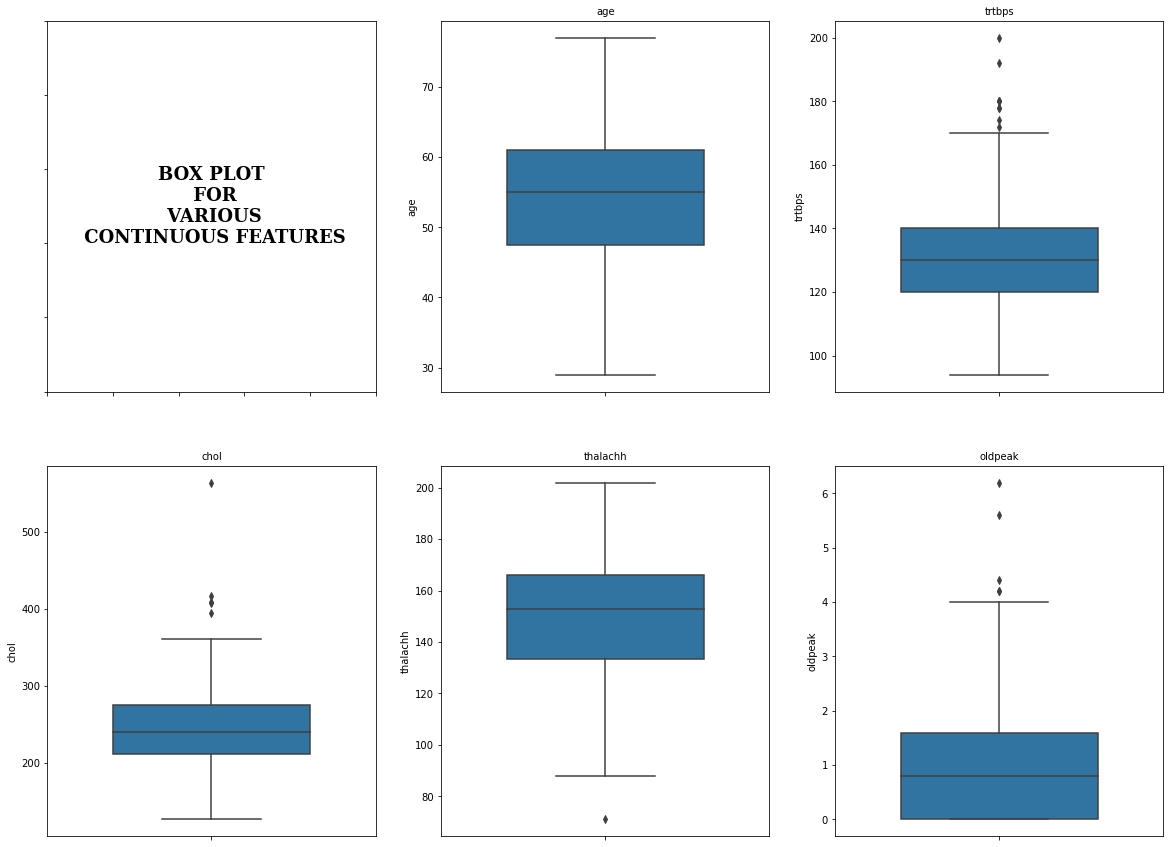

<Figure size 57600x57600 with 0 Axes>

In [12]:
# Visulaizing Continuos Features
fig2, axes2 = plt.subplots(2, 3, figsize=(20, 15))

bplot = Plot(fig2, axes2)

bplot.box_plot()

for feat in cont_features:
    
    bplot.box_plot(feat)

<AxesSubplot:xlabel='output', ylabel='count'>

<Figure size 7200x7200 with 0 Axes>

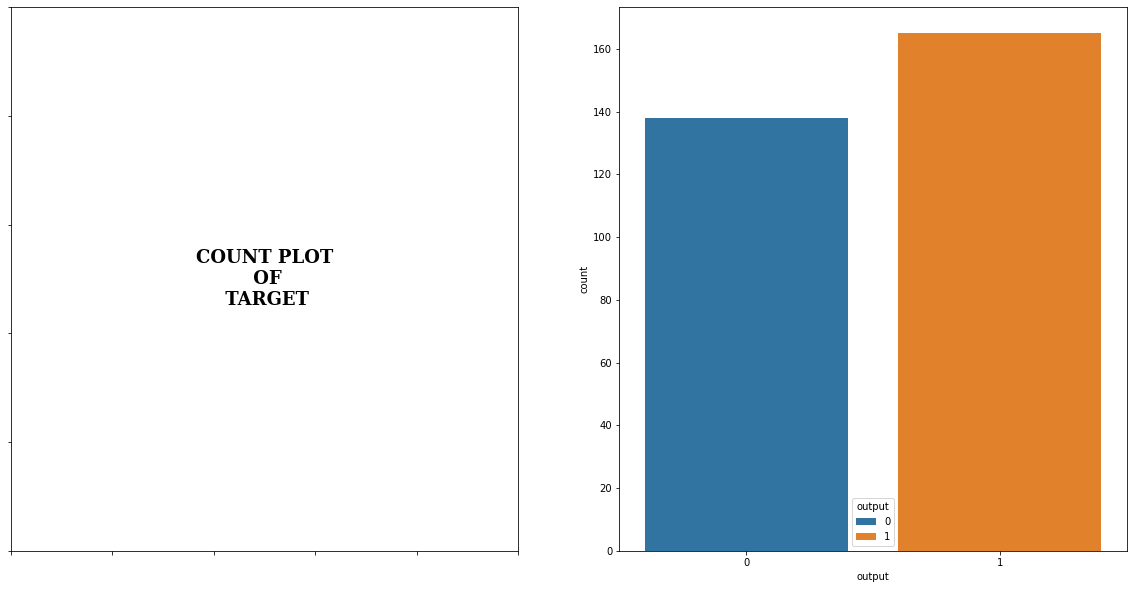

In [13]:
plt.figure(figsize=(100,100))

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_xticklabels([])
            
axes[0].set_yticklabels([])
            
axes[0].text(0.5,0.5, 'COUNT PLOT\n OF\n TARGET',horizontalalignment='center',verticalalignment='center',
                                             fontsize=18, fontweight='bold',
                                             fontfamily='serif',
                                             color="#000000")

sns.countplot(x=df[target[0]], hue=df[target[0]], dodge=False)

#### 3.2 Bivariate Analysis & Visualization

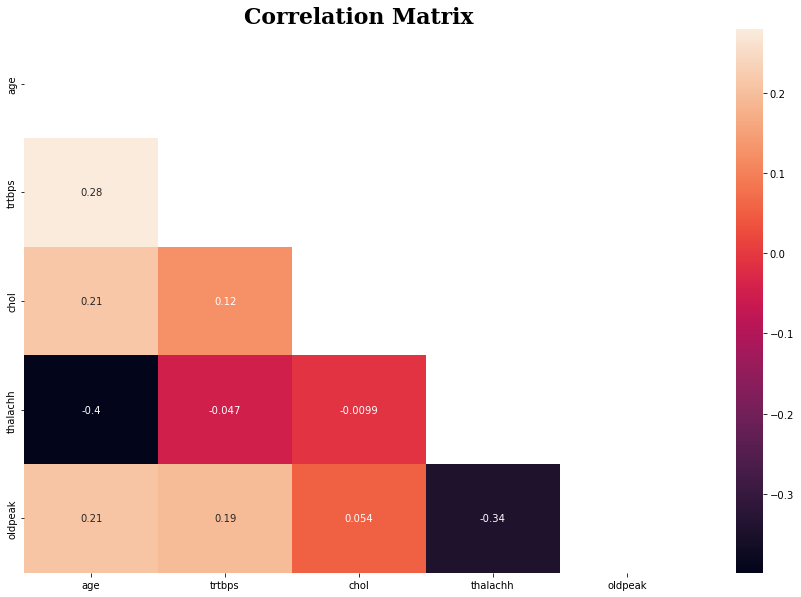

In [14]:
fig = plt.figure(figsize=(15, 10))

df_corr = df[cont_features].corr().transpose()

mask = np.zeros_like(df_corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, mask = mask, annot = True)

plt.title('Correlation Matrix', fontsize=22, fontweight='bold', 
          fontfamily='serif', color="#000000")

plt.show()

##### Observations:
 - There is no linear correlation between continuous variable according to the heatmap.

<Figure size 21600x21600 with 0 Axes>

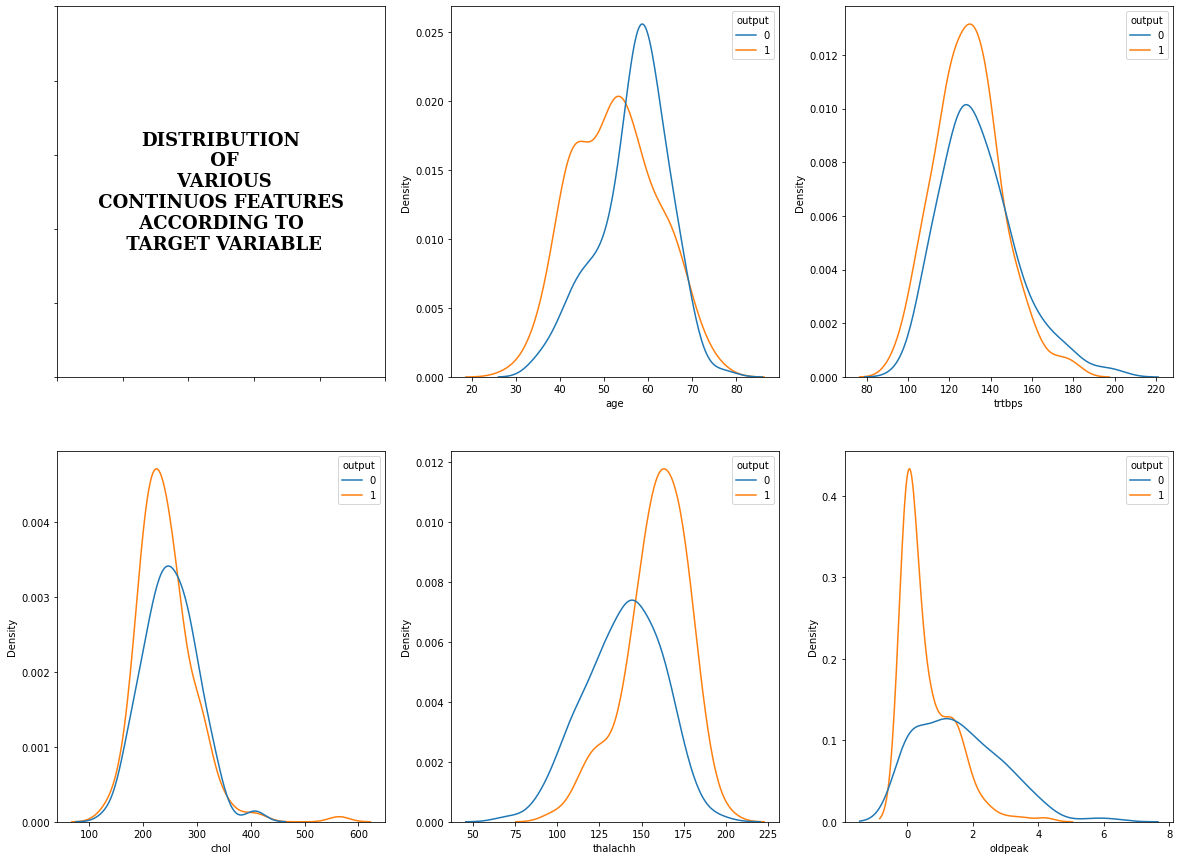

In [41]:
# Distribution of continuous features
fig = plt.figure(figsize=(300, 300))

fig, axes = plt.subplots(2, 3, figsize=(20, 15))

i = 0

j = 1

axes[0][0].set_xticklabels([])

axes[0][0].set_yticklabels([])

axes[0][0].text(0.5,0.5, 'DISTRIBUTION\n OF\n VARIOUS\n CONTINUOS FEATURES \n ACCORDING TO \n TARGET VARIABLE',
      horizontalalignment='center',
      verticalalignment='center',
      fontsize=18, fontweight='bold',
      fontfamily='serif',
      color="#000000")


for feat in cont_features:
    
    sns.kdeplot(x= df[feat], hue=df[target[0]] ,ax = axes[i][j])
    
    j += 1
    
    if j > 2:
        
        i += 1
        
        j = 0

##### Observations:
 - As per the general observations in our day-to-day life, as the age increases there is more chances of heart attack, but it isn't the case according to the data.
 - According to data, there are more chances of attack if the cholestoral is between 200-300 mg/dl.
 - People with lower pevious peak achieved have higher chances of heart attack.
 - People with maximum heart rate achieved above 150 have higher chances of heart attack.

### 4. Build A Predictive Model 

#### 4.1 Importing necessary Libraries

In [16]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

print("Packages Imported....")

Packages Imported....


#### 4.2 Scaling & Encoding

In [17]:
# Creating copy of dataframe
df_copy = df

# Encoding categorical features
df_copy = pd.get_dummies(df_copy, columns = cat_features, drop_first = True)

df_copy.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exng_1',
       'slp_1', 'slp_2', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')

In [18]:
X = df_copy.drop(['output'], axis= 1)

Y = df_copy[['output']]

rb_sc = RobustScaler()

X[cont_features] = rb_sc.fit_transform(X[cont_features])

X.head()

age  trtbps      chol  thalachh  oldpeak  sex_1  cp_1  cp_2  cp_3  \
0  0.592593    0.75 -0.110236 -0.092308   0.9375      1     0     0     1   
1 -1.333333    0.00  0.157480  1.046154   1.6875      1     0     1     0   
2 -1.037037    0.00 -0.566929  0.584615   0.3750      0     1     0     0   
3  0.074074   -0.50 -0.062992  0.769231   0.0000      1     1     0     0   
4  0.148148   -0.50  1.795276  0.307692  -0.1250      0     0     0     0   

   fbs_1  ...  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  \
0      1  ...       0      0      0      0      0      0      0        1   
1      0  ...       0      0      0      0      0      0      0        0   
2      0  ...       0      0      1      0      0      0      0        0   
3      0  ...       0      0      1      0      0      0      0        0   
4      0  ...       1      0      1      0      0      0      0        0   

   thall_2  thall_3  
0        0        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0  

[5 rows x 22 columns]

#### 4.3 Splitting the dataset

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, 
                                                    random_state = 42)

#### 4.4 Predictive Model

In [20]:
# <<<< SVM >>>>

model1 = SVC(kernel='linear', random_state = 42)

model1.fit(x_train, y_train.values.ravel())

y_pred = model1.predict(x_test)

acc_m1 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

0.8688524590163934


In [21]:
# <<<< Logistic Regression >>>>

model2 = LogisticRegression()

model2.fit(x_train, y_train.values.ravel())

y_pred = model2.predict(x_test)

acc_m2 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

0.9016393442622951


In [22]:
# <<<< DecisionTree >>>>

model3 = DecisionTreeClassifier()

model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

acc_m3 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

0.7704918032786885


In [23]:
# <<<< RandomForest >>>>

model4 = RandomForestClassifier()

model4.fit(x_train, y_train.values.ravel())

y_pred = model4.predict(x_test)

acc_m4 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

0.8360655737704918


In [24]:
# <<<< GradientBoosting >>>>

model5 = GradientBoostingClassifier()

model5.fit(x_train, y_train.values.ravel())

y_pred = model5.predict(x_test)

acc_m5 = accuracy_score(y_test, y_pred) * 100

print(accuracy_score(y_test, y_pred))

0.7868852459016393


In [25]:
# <<<< Hyperparameter tuning on SVM >>>>

model6 = SVC()

parameters = {"C":np.arange(1,10,1),
              'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,
                       0.1,0.5,1,5]}

searcher = GridSearchCV(model6, parameters)

# fitting the object
searcher.fit(x_train, y_train.values.ravel())

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

y_pred = searcher.predict(x_test)

acc_m6 = accuracy_score(y_test, y_pred) * 100

print("The test accuracy score of SVM after hyper-parameter tuning is", accuracy_score(y_test, y_pred))

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is 0.9016393442622951


#### 4.5 Visualizing Accuracies

<BarContainer object of 6 artists>

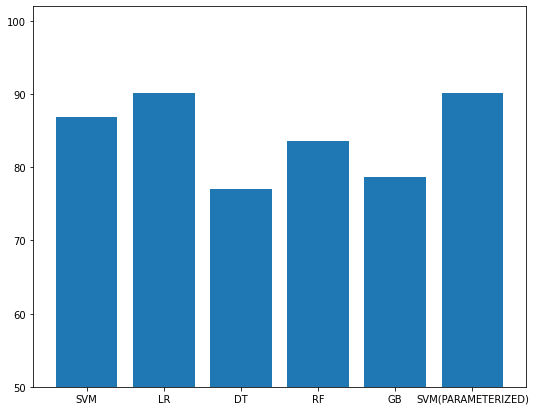

In [26]:
names = ['SVM','LR','DT','RF','GB', 'SVM(PARAMETERIZED)']

values = [acc_m1, acc_m2, acc_m3, acc_m4, acc_m5, acc_m6]

f = plt.figure(figsize=(30,7), num=10)

plt.subplot(131)

plt.ylim(50,102)

plt.bar(names,values)